# Food segmentation with a U-Net-like architecture

**Description:** Food segmentation model trained from scratch on coco dataset.

In [1]:
!git clone https://github.com/gmurro/FoodRecognition.git

Cloning into 'FoodRecognition'...
remote: Enumerating objects: 25511, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 25511 (delta 0), reused 5 (delta 0), pack-reused 25504
Receiving objects: 100% (25511/25511), 1.22 GiB | 30.18 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Checking out files: 100% (26709/26709), done.


In [2]:
%cd /content/FoodRecognition/src

/content/FoodRecognition/src


In [4]:
from extract_segmentation import ExtractSegmentations
import matplotlib.pyplot as plt
import numpy as np

## Prepare paths of input images and target segmentation masks

In [5]:
import os

input_train_dir = "../data/val/images/"
annotation_train = "../data/val/images/annotations.json"

img_size = (160, 160)
num_classes = 274
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_train_dir, fname)
        for fname in os.listdir(input_train_dir)
        if fname.endswith(".jpg")
    ]
)

'''
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)
for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)
'''
n_sample = len(input_img_paths)
print("Number of samples:", len(input_img_paths))

Number of samples: 1269


In [6]:
extractor = ExtractSegmentations("../data/val/")
masks = extractor.getMultiChannelMasks()
#extractor.mapCatIdsLabels #(274)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


In [ ]:
masks_imgs = list()

for mask in masks:
  mask = masks[11]

  mask_img = np.zeros((mask[0].shape[0], mask[0].shape[1], num_classes))

  labels = [extractor.mapCatIdsLabels[id] for id in mask[1]]

  for i, label in enumerate(labels):
    mask_img[:,:,label] = mask[0][:,:,i]

  masks_imgs.append(mask_img)

plt.imshow(masks[11][0]*255)

NameError: ignored

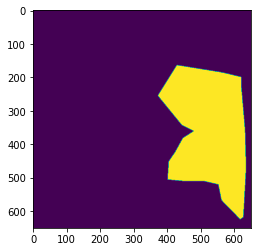

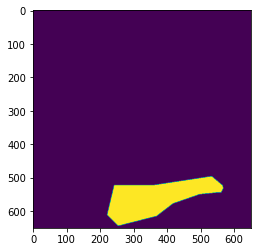

[1022, 1788]


In [8]:
plt.imshow(masks[0][0][:,:,0])
plt.show()
plt.imshow(masks[0][0][:,:,1])
plt.show()

print(masks[0][1])

## What does one input image and corresponding segmentation mask look like?

In [ ]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[7]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)